<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

![](https://g.foolcdn.com/editorial/images/160336/falling_stock_chart.jpg)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os

In [2]:
df=pd.read_csv('./african_crises.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
df.shape

(1059, 14)

In [5]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [6]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [7]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [8]:
df.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


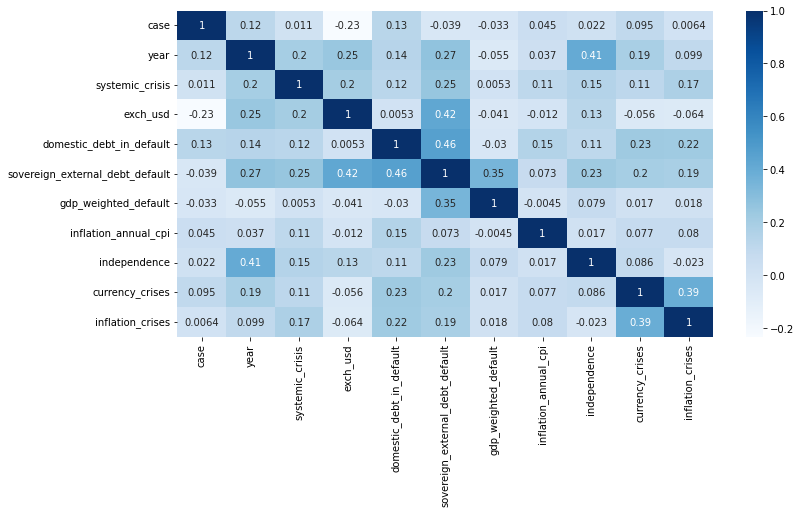

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [10]:
px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')

In [11]:
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

In [12]:
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

In [13]:
px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

In [14]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')

In [15]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')

In [16]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [17]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [18]:
df_bk=df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [20]:
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

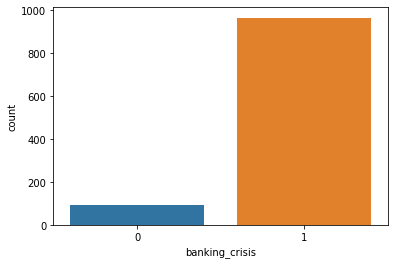

In [21]:
sns.countplot(df['banking_crisis'])
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

      case  cc3  country  year  systemic_crisis    exch_usd  \
0        1    3        0  1870                1    0.052264   
1        1    3        0  1871                0    0.052798   
2        1    3        0  1872                0    0.052274   
3        1    3        0  1873                0    0.051680   
4        1    3        0  1874                0    0.051308   
...    ...  ...      ...   ...              ...         ...   
1104    10    1        2  1991                1  258.999817   
1105    19    4        3  1981                1    0.700000   
1106    10    1        2  1994                1  534.599622   
1107    45    8        8  2014                1  155.250000   
1108    56   10        9  1989                0    2.536011   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                            0            

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((776, 13), (333, 13), (776,), (333,))

In [24]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [25]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[291   2]
 [  5  35]]
Outcome values : 
 291 2 5 35
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       293
           0       0.95      0.88      0.91        40

    accuracy                           0.98       333
   macro avg       0.96      0.93      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.9 %
Precision : 98.3 %
Recall : 99.3 %
F1 Score : 0.988
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 93.4 %
MCC : MCC
roc_auc_score: 0.934


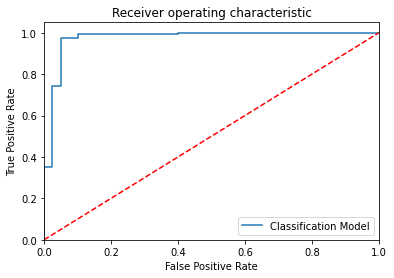

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[130 163]
 [  1  39]]
Outcome values : 
 130 163 1 39
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.44      0.61       293
           0       0.19      0.97      0.32        40

    accuracy                           0.51       333
   macro avg       0.59      0.71      0.47       333
weighted avg       0.90      0.51      0.58       333

Accuracy : 50.8 %
Precision : 99.2 %
Recall : 44.4 %
F1 Score : 0.613
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 71.0 %
MCC : MCC
roc_auc_score: 0.709


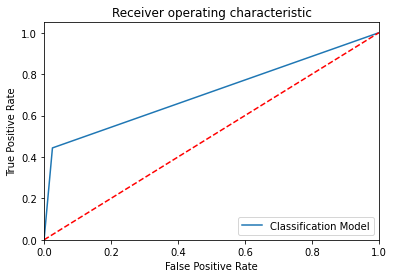

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[288   5]
 [  3  37]]
Outcome values : 
 288 5 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       293
           0       0.88      0.93      0.90        40

    accuracy                           0.98       333
   macro avg       0.94      0.95      0.94       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.6 %
Precision : 99.0 %
Recall : 98.3 %
F1 Score : 0.986
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 95.4 %
MCC : MCC
roc_auc_score: 0.954


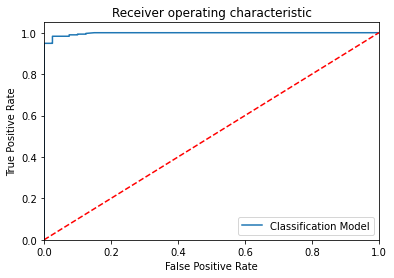

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[289   4]
 [  3  37]]
Outcome values : 
 289 4 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.90      0.93      0.91        40

    accuracy                           0.98       333
   macro avg       0.95      0.96      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.9 %
Precision : 99.0 %
Recall : 98.6 %
F1 Score : 0.988
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 95.6 %
MCC : MCC
roc_auc_score: 0.956


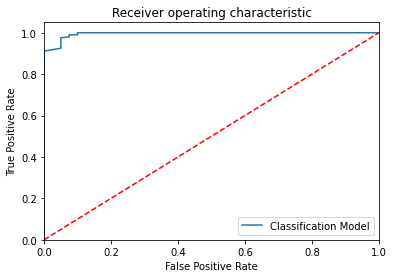

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[290   3]
 [  3  37]]
Outcome values : 
 290 3 3 37
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.93      0.93      0.93        40

    accuracy                           0.98       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 98.2 %
Precision : 99.0 %
Recall : 99.0 %
F1 Score : 0.99
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 95.8 %
MCC : MCC
roc_auc_score: 0.957


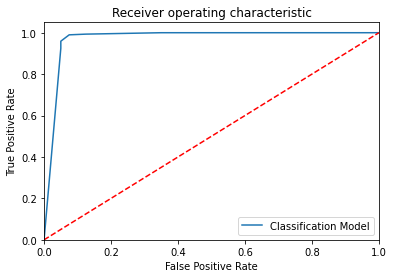

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[291   2]
 [  4  36]]
Outcome values : 
 291 2 4 36
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.95      0.90      0.92        40

    accuracy                           0.98       333
   macro avg       0.97      0.95      0.96       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 98.2 %
Precision : 98.6 %
Recall : 99.3 %
F1 Score : 0.99
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 94.6 %
MCC : MCC
roc_auc_score: 0.947


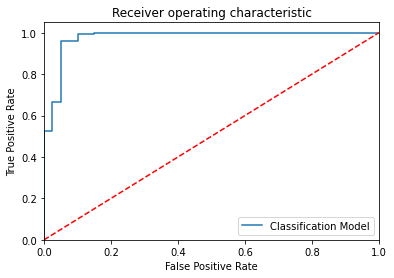

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 77 216]
 [  0  40]]
Outcome values : 
 77 216 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.26      0.42       293
           0       0.16      1.00      0.27        40

    accuracy                           0.35       333
   macro avg       0.58      0.63      0.34       333
weighted avg       0.90      0.35      0.40       333

Accuracy : 35.1 %
Precision : 100.0 %
Recall : 26.3 %
F1 Score : 0.416
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 63.2 %
MCC : MCC
roc_auc_score: 0.631


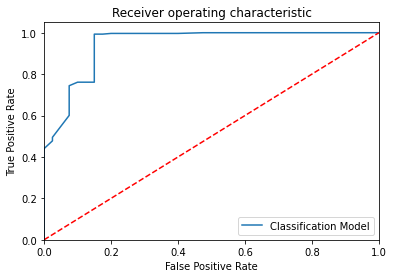

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[287   6]
 [  2  38]]
Outcome values : 
 287 6 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       293
           0       0.86      0.95      0.90        40

    accuracy                           0.98       333
   macro avg       0.93      0.96      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.6 %
Precision : 99.3 %
Recall : 98.0 %
F1 Score : 0.986
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 96.5 %
MCC : MCC
roc_auc_score: 0.965


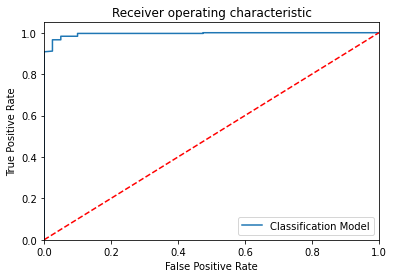

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[282  11]
 [  6  34]]
Outcome values : 
 282 11 6 34
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.96      0.97       293
           0       0.76      0.85      0.80        40

    accuracy                           0.95       333
   macro avg       0.87      0.91      0.89       333
weighted avg       0.95      0.95      0.95       333

Accuracy : 94.9 %
Precision : 97.9 %
Recall : 96.2 %
F1 Score : 0.971
Specificity or True Negative Rate : 85.0 %
Balanced Accuracy : 90.6 %
MCC : MCC
roc_auc_score: 0.906


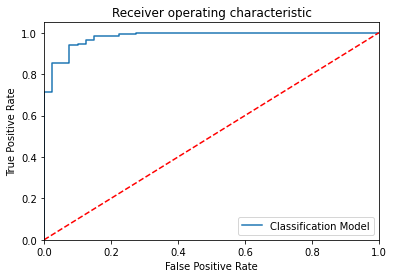

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : MCC
roc_auc_score: 0.502


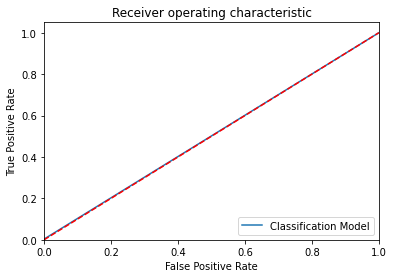

-----------------------------------------------------------------------------------------------------


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [27]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),291.0,2.0,5.0,35.0,0.979,0.983,0.993,0.988,0.875,0.898,0.934087,0.934
1,DecisionTreeClassifier(),130.0,163.0,1.0,39.0,0.508,0.992,0.444,0.613,0.975,0.279,0.709343,0.710
2,"(DecisionTreeClassifier(max_features='auto', r...",288.0,5.0,3.0,37.0,0.976,0.990,0.983,0.986,0.925,0.889,0.953968,0.954
3,"(ExtraTreeClassifier(random_state=1296674387),...",289.0,4.0,3.0,37.0,0.979,0.990,0.986,0.988,0.925,0.902,0.955674,0.956
4,KNeighborsClassifier(),290.0,3.0,3.0,37.0,0.982,0.990,0.990,0.990,0.925,0.915,0.957381,0.958
5,SVC(probability=True),291.0,2.0,4.0,36.0,0.982,0.986,0.993,0.990,0.900,0.913,0.946587,0.946
6,(DecisionTreeClassifier(random_state=198455686...,77.0,216.0,0.0,40.0,0.351,1.000,0.263,0.416,1.000,0.203,0.631399,0.632
7,([DecisionTreeRegressor(criterion='friedman_ms...,287.0,6.0,2.0,38.0,0.976,0.993,0.980,0.986,0.950,0.892,0.964761,0.965
8,LGBMClassifier(),282.0,11.0,6.0,34.0,0.949,0.979,0.962,0.971,0.850,0.773,0.906229,0.906
9,GaussianNB(),1.0,292.0,0.0,40.0,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501


In [28]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.982,0.986,0.993,0.990,291.0,2.0,4.0,36.0
1,KNeighborsClassifier,0.982,0.990,0.990,0.990,290.0,3.0,3.0,37.0
2,LogisticRegression,0.979,0.983,0.993,0.988,291.0,2.0,5.0,35.0
3,ExtraTreesClassifier,0.979,0.990,0.986,0.988,289.0,4.0,3.0,37.0
4,RandomForestClassifier,0.976,0.990,0.983,0.986,288.0,5.0,3.0,37.0
5,GradientBoostingClassifier,0.976,0.993,0.980,0.986,287.0,6.0,2.0,38.0
6,LGBMClassifier,0.949,0.979,0.962,0.971,282.0,11.0,6.0,34.0
7,DecisionTreeClassifier,0.508,0.992,0.444,0.613,130.0,163.0,1.0,39.0
8,BaggingClassifier,0.351,1.000,0.263,0.416,77.0,216.0,0.0,40.0
9,GaussianNB,0.123,1.000,0.003,0.007,1.0,292.0,0.0,40.0


### From the above results, the top model is Support Vector Classifier

In [29]:
y_pred=ModelSVM.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_bk.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)
out[['country','year','banking_crisis','predicted']].sample(10)

,country,year,banking_crisis,predicted
506,Mauritius,1948,no_crisis,no_crisis
572,Mauritius,2014,no_crisis,no_crisis
156,Angola,2009,no_crisis,no_crisis
299,Egypt,1876,no_crisis,no_crisis
531,Mauritius,1973,no_crisis,no_crisis
182,Central African Republic,1977,crisis,crisis
782,South Africa,1974,no_crisis,no_crisis
256,Ivory Coast,1988,crisis,crisis
740,South Africa,1932,no_crisis,no_crisis
413,Egypt,1990,crisis,no_crisis
